## Predict titanic survival

Information about data and competition
https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier

import math

In [3]:
titanic_df = pd.read_csv('/Users/mukti/Documents/1_Python_MP/Datasets/Kaggle_titanic/train.csv')

In [4]:
titanic_df['Fare'].isna().value_counts()

False    891
Name: Fare, dtype: int64

In [5]:
labels = titanic_df['Survived']
math.isnan(titanic_df['Age'][5])

True

#### Feature conversion

In [6]:
titanic_df['is_male'] = titanic_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)


In [7]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['is_embarkedS'] = titanic_df['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
titanic_df['is_embarkedC'] = titanic_df['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
titanic_df['is_embarkedQ'] = titanic_df['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)

In [8]:
def fetch_salutation(string):
    second_string = string[string.find(',')+2:]
    lst = second_string.split(' ')
    if lst[0] == 'the':
        return lst[1]
    return lst[0]
         

In [9]:
titanic_df['salutation'] = titanic_df['Name'].apply(fetch_salutation)

titanic_df['salutation'].unique()

# nobility: Don. Rev. Lady. Sir. Countess. Jonkheer.
# military: Col. Major. Capt.

titanic_df['is_nobility'] = titanic_df['salutation'].apply(lambda x: 1 if x in ['Don.', 'Rev.', 'Lady.', 'Sir.', 'Countess.', 'Jonkheer.'] else 0)
titanic_df['is_military'] = titanic_df['salutation'].apply(lambda x: 1 if x in ['Col.', 'Major.', 'Capt.'] else 0)
titanic_df['is_dr'] = titanic_df['salutation'].apply(lambda x: 1 if x == 'Dr.' else 0)



In [10]:
agebytitle = dict(titanic_df.groupby('salutation')['Age'].mean())   
agebytitle

{'Capt.': 70.0,
 'Col.': 58.0,
 'Countess.': 33.0,
 'Don.': 40.0,
 'Dr.': 42.0,
 'Jonkheer.': 38.0,
 'Lady.': 48.0,
 'Major.': 48.5,
 'Master.': 4.574166666666667,
 'Miss.': 21.773972602739725,
 'Mlle.': 24.0,
 'Mme.': 24.0,
 'Mr.': 32.368090452261306,
 'Mrs.': 35.898148148148145,
 'Ms.': 28.0,
 'Rev.': 43.166666666666664,
 'Sir.': 49.0}

In [11]:


def fill_age(df, agebytitle):
    filled_agelist = []
    age_mean = df['Age'].mean()
    for index in df.index:
        if math.isnan(df['Age'][index]):
            avgage = agebytitle[df['salutation'][index]]
            if math.isnan(avgage):
                filled_agelist.append(age_mean)
            else:
                filled_agelist.append(avgage)
        else:
            filled_agelist.append(df['Age'][index])
    df['filled_age'] = filled_agelist


In [12]:
fill_age(titanic_df, agebytitle)
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,is_male,is_embarkedS,is_embarkedC,is_embarkedQ,salutation,is_nobility,is_military,is_dr,filled_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,1,0,0,Mr.,0,0,0,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,Mrs.,0,0,0,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,1,0,0,Miss.,0,0,0,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,1,0,0,Mrs.,0,0,0,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,1,0,0,Mr.,0,0,0,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,1,0,0,1,Mr.,0,0,0,32.368090
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,1,0,0,Mr.,0,0,0,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1,1,0,0,Master.,0,0,0,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,1,0,0,Mrs.,0,0,0,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,0,0,1,0,Mrs.,0,0,0,14.000000


In [13]:
titanic_df['is_cabin'] = titanic_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)


In [14]:
titanic_df['is_class1'] = titanic_df['Pclass'].apply(lambda x: 1 if x == 1 else 0)
titanic_df['is_class2'] = titanic_df['Pclass'].apply(lambda x: 1 if x == 2 else 0)
titanic_df['is_class3'] = titanic_df['Pclass'].apply(lambda x: 1 if x == 3 else 0)

#### Normalized features

In [15]:
# Z score
age_mean = titanic_df['filled_age'].mean()
age_std = titanic_df['filled_age'].std()


titanic_df['z_age'] = titanic_df['filled_age'].apply(lambda x: (x-age_mean)/age_std)

titanic_df['normalized_age'] = titanic_df['filled_age'].apply(lambda x: (x-titanic_df['filled_age'].min())/(titanic_df['filled_age'].max()-titanic_df['filled_age'].min()))


In [16]:
fare_mean = titanic_df['Fare'].mean()
fare_std = titanic_df['Fare'].std()
titanic_df['z_fare'] = titanic_df['Fare'].apply(lambda x: (x-fare_mean)/fare_std)

titanic_df['normalized_fare'] = titanic_df['Fare'].apply(lambda x: (x-titanic_df['Fare'].min())/(titanic_df['Fare'].max()-titanic_df['Fare'].min()))
                                                       

In [17]:
titanic_df['normalized_class'] = titanic_df['Pclass'].apply(lambda x: (x-1)/2)

In [18]:
titanic_df['is_child'] = titanic_df['Age'].apply(lambda x: 1 if x < 18 else 0)
titanic_df['is_adult'] = titanic_df['Age'].apply(lambda x: 1 if x >= 18 else 0)
titanic_df['is_senior'] = titanic_df['Age'].apply(lambda x: 1 if x >= 65 else 0)


In [19]:

titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_male',
       'is_embarkedS', 'is_embarkedC', 'is_embarkedQ', 'salutation',
       'is_nobility', 'is_military', 'is_dr', 'filled_age', 'is_cabin',
       'is_class1', 'is_class2', 'is_class3', 'z_age', 'normalized_age',
       'z_fare', 'normalized_fare', 'normalized_class', 'is_child', 'is_adult',
       'is_senior'],
      dtype='object')

## Scatter plots

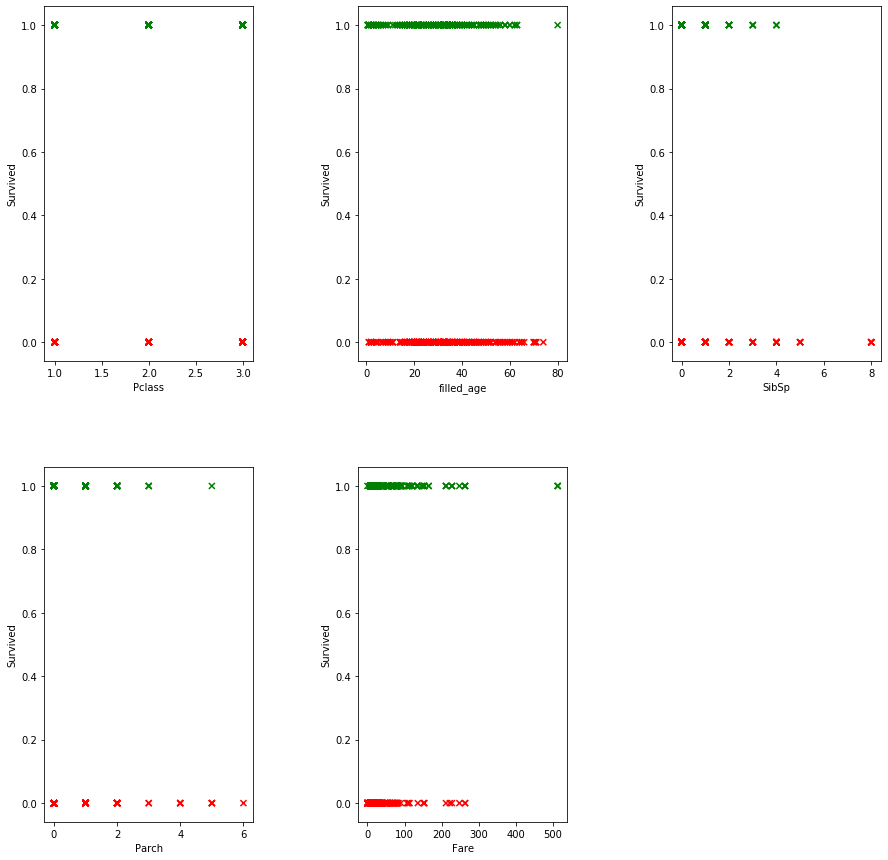

In [20]:
colorpicker = lambda x: 'green' if x == 1 else 'red'


def scatter(features, labels):
    count = 1
    plt.figure(figsize=(15,15))
    for feature in features:
        plt.subplot(2, 3, count)
        plt.scatter(titanic_df[feature],labels,marker = 'x', color = labels.apply(colorpicker))
        plt.ylabel('Survived')
        plt.xlabel(feature)
        count += 1
    plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
    plt.show


features = ['Pclass', 'filled_age', 'SibSp', 'Parch', 'Fare']

scatter(features, labels)

#### Age - Boxplot and quartiles

Text(0, 0.5, 'Age')

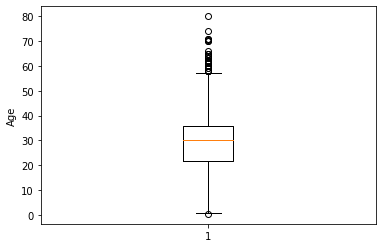

In [21]:
plt.boxplot(titanic_df['filled_age'])
plt.ylabel('Age')

In [22]:
print('25th percentile is ' + str(np.quantile(titanic_df['filled_age'], 0.25)))
print('Median is ' + str(np.quantile(titanic_df['filled_age'], 0.5)))
print('75th percentile is ' + str(np.quantile(titanic_df['filled_age'], 0.75)))

25th percentile is 21.773972602739725
Median is 30.0
75th percentile is 35.898148148148145


#### Fare -  boxplot and quartiles

Text(0, 0.5, 'Fare')

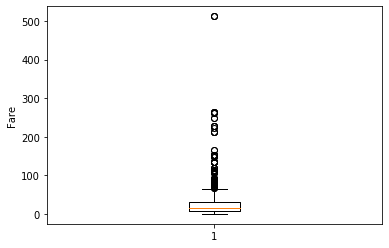

In [23]:
plt.boxplot(titanic_df['Fare'])
plt.ylabel('Fare')

In [24]:
print('25th percentile is ' + str(np.quantile(titanic_df['normalized_fare'], 0.25)))
print('Median is ' + str(np.quantile(titanic_df['normalized_fare'], 0.5)))
print('75th percentile is ' + str(np.quantile(titanic_df['normalized_fare'], 0.75)))
print('90th percentile is ' + str(np.quantile(titanic_df['normalized_fare'], 0.9)))

25th percentile is 0.015440072515874557
Median is 0.028212719478023115
75th percentile is 0.060507970265993034
90th percentile is 0.15216446768991498


In [25]:
print('25th percentile is ' + str(np.quantile(titanic_df['SibSp'], 0.25)))
print('Median is ' + str(np.quantile(titanic_df['SibSp'], 0.5)))
print('75th percentile is ' + str(np.quantile(titanic_df['SibSp'], 0.75)))

25th percentile is 0.0
Median is 0.0
75th percentile is 1.0


In [26]:
print('25th percentile is ' + str(np.quantile(titanic_df['Parch'], 0.25)))
print('Median is ' + str(np.quantile(titanic_df['Parch'], 0.5)))
print('75th percentile is ' + str(np.quantile(titanic_df['Parch'], 0.75)))

25th percentile is 0.0
Median is 0.0
75th percentile is 0.0


## Analyses

In [27]:
titanic_df.groupby(['Pclass', 'Survived']).size().unstack(-1)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [28]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
titanic_df.groupby(['SibSp', 'Survived']).size().unstack(-1)

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [30]:
titanic_df.groupby(['Parch', 'Survived']).size().unstack(-1)

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


#### Additional features based on analyses

In [31]:
titanic_df['is_noSibSp'] = titanic_df['SibSp'].apply(lambda x: 1 if x == 0 else 0)


In [32]:
titanic_df['is_noParch'] = titanic_df['Parch'].apply(lambda x: 1 if x == 0 else 0)

In [33]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_male',
       'is_embarkedS', 'is_embarkedC', 'is_embarkedQ', 'salutation',
       'is_nobility', 'is_military', 'is_dr', 'filled_age', 'is_cabin',
       'is_class1', 'is_class2', 'is_class3', 'z_age', 'normalized_age',
       'z_fare', 'normalized_fare', 'normalized_class', 'is_child', 'is_adult',
       'is_senior', 'is_noSibSp', 'is_noParch'],
      dtype='object')

In [34]:
# Female of a certain class?
# class 1 female more likely
# class 1 male less likely
# other class males less likely to survive
# with cabin more likely

In [35]:
# Age split by quartiles

age_q1 = np.quantile(titanic_df['filled_age'], 0.25)
age_q2 = np.quantile(titanic_df['filled_age'], 0.50)
age_q3 = np.quantile(titanic_df['filled_age'], 0.75)
age_iqr = age_q3 - age_q1


def bin_age(x):
    if x <= age_q1:
        return 0.25
    elif age_q1 < x <= age_q2:
        return 0.5
    elif age_q2 < x <= age_q3:
        return 0.75
    elif x > age_q3:
        return 1.0
    
titanic_df['binned_age'] = titanic_df['filled_age'].apply(bin_age)    

In [36]:
# Fare split by quartiles

fare_q1 = np.quantile(titanic_df['Fare'], 0.25)
fare_q2 = np.quantile(titanic_df['Fare'], 0.50)
fare_q3 = np.quantile(titanic_df['Fare'], 0.75)
fare_iqr = fare_q3 - fare_q1

def bin_fare(x):
    if x <= fare_q1:
        return 0.25
    elif fare_q1 < x <= fare_q2:
        return 0.5
    elif fare_q2 < x <= fare_q3:
        return 0.75
    elif x > fare_q3:
        return 1.0

In [37]:
titanic_df['binned_fare'] = titanic_df['Fare'].apply(bin_fare)    

In [38]:
#titanic_df['is_femaleclass1'] = titanic_df.apply(lambda x: 1 if (x['is_male']==0 & x['is_class1']==1) else 0, axis=1)
# class3males
# class1 and 2 females more likely
# nocabinmale

In [39]:
# Males without cabin
titanic_df['is_male_nocabin'] = titanic_df.apply(lambda row: 1 if (row['is_male']==1 and row['is_cabin']==0) else 0, axis=1)


In [40]:
# Class3 males

titanic_df['is_male_class3'] = titanic_df.apply(lambda row: 1 if row['is_male'] == 1 and row['is_class3']==1 else 0, axis=1)


In [41]:
titanic_df[['Sex', 'Cabin', 'is_male_nocabin']]

,Sex,Cabin,is_male_nocabin
0,male,NaN,1
1,female,C85,0
2,female,NaN,0
3,female,C123,0
4,male,NaN,1
...,...,...,...
886,male,NaN,1
887,female,B42,0
888,female,NaN,0
889,male,C148,0


#### Feature combinations

In [42]:
features_1 = ['SibSp','Parch','is_male',
       'is_embarkedS', 'is_embarkedC', 'is_embarkedQ', 'is_nobility', 'is_military', 
        'is_dr', 'is_cabin', 'is_class1',
       'is_class2', 'is_class3', 'normalized_age',
       'normalized_class', 'is_child', 'is_adult', 'is_senior',
       'normalized_fare','is_noSibSp', 'is_noParch']

features_2 = ['is_male',
       'is_embarkedS', 'is_embarkedC', 'is_embarkedQ', 'is_nobility', 'is_military', 
        'is_dr', 'is_cabin', 'is_class1','is_class2', 'is_class3', 
        'is_child', 'is_adult', 'is_senior','is_noSibSp', 'is_noParch', 'binned_age', 'binned_fare']

features_3 = ['is_male',
       'is_embarkedS', 'is_embarkedC', 'is_embarkedQ', 'is_nobility', 'is_military', 'is_dr', 
              'is_cabin', 'is_class1', 'is_class2', 'is_class3', 'z_age', 'normalized_age', 'z_fare',
       'normalized_fare', 'normalized_class', 'is_child', 'is_adult',
       'is_senior', 'is_noSibSp', 'is_noParch', 'binned_age', 'binned_fare',
       'is_male_nocabin', 'is_male_class3']

features_4 = ['is_male', 'is_cabin', 'is_class1', 'is_class2', 'is_class3', 'is_child', 'is_adult',
       'is_senior', 'is_noSibSp', 'is_noParch', 'binned_age', 'binned_fare',
       'is_male_nocabin', 'is_male_class3']

## MODELS

In [43]:
# Logistic regression
# KNN
# SVM
# Random forest

In [44]:
def run_logistic(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)
    log_regr = LogisticRegression()
    log_regr.fit(x_train, y_train)
    y_predicted = log_regr.predict(x_test)
    print('LR-Accuracy score:' + str(accuracy_score(y_test, y_predicted)))
    print('LR-Precision:' + str(precision_score(y_test, y_predicted)))
    print('LR-Recall:' + str(recall_score(y_test, y_predicted)))
    print('LR-F1_score:' + str(f1_score(y_test, y_predicted)))    
    

In [45]:
run_logistic(titanic_df[features_1], labels)

LR-Accuracy score:0.8491620111731844
LR-Precision:0.8360655737704918
LR-Recall:0.75
LR-F1_score:0.7906976744186046


In [46]:
def run_randomforest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(x_train, y_train)
    rf_importance = clf.feature_importances_
    y_predicted = clf.predict(x_test)
    print(rf_importance)
    print('RF-Accuracy score:' + str(accuracy_score(y_test, y_predicted)))
    print('RF-Precision:' + str(precision_score(y_test, y_predicted)))
    print('RF-Recall:' + str(recall_score(y_test, y_predicted)))
    print('RF-F1_score:' + str(f1_score(y_test, y_predicted)))
    return x_test, y_test, y_predicted
    

In [47]:
x_test, y_test, y_predicted = run_randomforest(titanic_df[features_1], labels)

[0.02953338 0.02480979 0.2160551  0.02002258 0.01692512 0.01155524
 0.00183244 0.00328285 0.00223051 0.04029657 0.01690218 0.01239652
 0.03245762 0.22008791 0.03263257 0.01434243 0.02250005 0.00371726
 0.24273501 0.01699924 0.01868562]
RF-Accuracy score:0.8324022346368715
RF-Precision:0.796875
RF-Recall:0.75
RF-F1_score:0.7727272727272727


#### Comparison of predicted and actual values - Random Forest

In [48]:
# Create a dataframe by merging and actual and predicted result series.
new_df = pd.DataFrame({'predicted_survival': y_predicted, 'actual_survival': y_test})
new_df.head(60)

,predicted_survival,actual_survival
126,0,0
354,0,0
590,0,0
509,0,1
769,0,0
545,0,0
759,1,1
261,0,1
329,1,1
349,0,0


In [51]:
def run_knn(x,y,k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    y_probabilities = knn.predict_proba(x_test)
    print('KNN-Accuracy score:' + str(accuracy_score(y_test, y_predicted)))
    print('KNN-Precision:' + str(precision_score(y_test, y_predicted)))
    print('KNN-Recall:' + str(recall_score(y_test, y_predicted)))
    print('KNN-F1_score:' + str(f1_score(y_test, y_predicted)))
    

In [52]:
run_knn(titanic_df[features_1], labels, 5)

KNN-Accuracy score:0.8044692737430168
KNN-Precision:0.746268656716418
KNN-Recall:0.7352941176470589
KNN-F1_score:0.7407407407407408


In [53]:
run_logistic(titanic_df[features_2], labels)

LR-Accuracy score:0.8156424581005587
LR-Precision:0.7868852459016393
LR-Recall:0.7058823529411765
LR-F1_score:0.7441860465116278


In [54]:
run_randomforest(titanic_df[features_1], labels)

[0.02953338 0.02480979 0.2160551  0.02002258 0.01692512 0.01155524
 0.00183244 0.00328285 0.00223051 0.04029657 0.01690218 0.01239652
 0.03245762 0.22008791 0.03263257 0.01434243 0.02250005 0.00371726
 0.24273501 0.01699924 0.01868562]
RF-Accuracy score:0.8324022346368715
RF-Precision:0.796875
RF-Recall:0.75
RF-F1_score:0.7727272727272727


(     SibSp  Parch  is_male  is_embarkedS  is_embarkedC  is_embarkedQ  \
 126      0      0        1             0             0             1   
 354      0      0        1             0             1             0   
 590      0      0        1             1             0             0   
 509      0      0        1             1             0             0   
 769      0      0        1             1             0             0   
 ..     ...    ...      ...           ...           ...           ...   
 732      0      0        1             1             0             0   
 42       0      0        1             0             1             0   
 179      0      0        1             1             0             0   
 123      0      0        0             1             0             0   
 890      0      0        1             0             0             1   
 
      is_nobility  is_military  is_dr  is_cabin  ...  is_class2  is_class3  \
 126            0            0      0       

In [57]:
run_knn(titanic_df[features_3], labels, 5)

KNN-Accuracy score:0.8100558659217877
KNN-Precision:0.7741935483870968
KNN-Recall:0.7058823529411765
KNN-F1_score:0.7384615384615385


#### SUBMISSION 1 - RANDOM FOREST WITH 'features_1' as the feature list.

#### Load the test set into a dataframe

In [59]:
titanic_testset = pd.read_csv('/Users/mukti/Documents/1_Python_MP/Datasets/Kaggle_titanic/test.csv')
titanic_testset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Columns with Nan values

In [60]:
# Fare, Age, Cabin


In [61]:
titanic_testset.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    115.591168
        male       75.586551
2       female     26.438750
        male       20.184654
3       female     13.735129
        male       11.826350
Name: Fare, dtype: float64

#### Add features in the test set

In [62]:
# Fare has 1 missing value - class 3 male, 60. So, the missing value was filled with the mean fare of class3 males. (See groupby analysis from above).
# Cabin
# Age


def add_features(df):    
    df['is_male'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['is_embarkedS'] = df['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
    df['is_embarkedC'] = df['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
    df['is_embarkedQ'] = df['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
    df['salutation'] = df['Name'].apply(fetch_salutation)
    agebytitle_test = dict(df.groupby('salutation')['Age'].mean())
    fill_age(df, agebytitle_test)
    df['is_nobility'] = df['salutation'].apply(lambda x: 1 if x in ['Don.', 'Rev.', 'Lady.', 'Sir.', 'Countess.', 'Jonkheer.'] else 0)
    df['is_military'] = df['salutation'].apply(lambda x: 1 if x in ['Col.', 'Major.', 'Capt.'] else 0)
    df['is_dr'] = df['salutation'].apply(lambda x: 1 if x == 'Dr.' else 0)
    df['is_cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
    df['is_class1'] = df['Pclass'].apply(lambda x: 1 if x == 1 else 0)
    df['is_class2'] = df['Pclass'].apply(lambda x: 1 if x == 2 else 0)
    df['is_class3'] = df['Pclass'].apply(lambda x: 1 if x == 3 else 0)
    age_testmean = df['filled_age'].mean()
    age_teststd = df['filled_age'].std()
    df['z_age'] = df['filled_age'].apply(lambda x: (x-age_testmean)/age_teststd)
    df['normalized_age'] = df['filled_age'].apply(lambda x: (x-df['filled_age'].min())/(df['filled_age'].max()-df['filled_age'].min()))
    df['Fare'] = df['Fare'].fillna(11.826350)
    fare_testmean = df['Fare'].mean()
    fare_teststd = df['Fare'].std()
    df['z_fare'] = df['Fare'].apply(lambda x: (x-fare_testmean)/fare_teststd)
    df['normalized_fare'] = df['Fare'].apply(lambda x: (x-df['Fare'].min())/(df['Fare'].max()-df['Fare'].min()))
    df['normalized_class'] = df['Pclass'].apply(lambda x: (x-1)/2)
    df['is_child'] = df['filled_age'].apply(lambda x: 1 if x < 18 else 0)
    df['is_adult'] = df['filled_age'].apply(lambda x: 1 if x >= 18 else 0)
    df['is_senior'] = df['filled_age'].apply(lambda x: 1 if x >= 65 else 0)
    df['is_noSibSp'] = df['SibSp'].apply(lambda x: 1 if x == 0 else 0)
    df['is_noParch'] = df['Parch'].apply(lambda x: 1 if x == 0 else 0)
    df['binned_fare'] = df['Fare'].apply(bin_fare) 
    df['is_male_nocabin'] = df.apply(lambda row: 1 if row['is_male']==1 and row['is_cabin']==1 else 0, axis=1)
    df['is_male_class3'] = df.apply(lambda row: 1 if row['is_male'] == 1 and row['is_class3']==1 else 0, axis=1)
    
    
add_features(titanic_testset)    

In [63]:
titanic_testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,normalized_fare,normalized_class,is_child,is_adult,is_senior,is_noSibSp,is_noParch,binned_fare,is_male_nocabin,is_male_class3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0.015282,1.0,0,1,0,1,1,0.25,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0.013663,1.0,0,1,0,0,1,0.25,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0.018909,0.5,0,1,0,1,1,0.50,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0.016908,1.0,0,1,0,1,1,0.50,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0.023984,1.0,0,1,0,0,0,0.50,0,0


In [64]:
# Dataframe is ready with all features.
# Next, run the model, fetch Pass IDs from original frame and then merge 

#### Fit the model on the entire training data and predict test values

In [65]:
# Create a model.
clf = RandomForestClassifier(random_state=0)
# Train the model on the entire training data without splitting it.
clf.fit(titanic_df[features_1], labels)
# Predict survival values.
titanic_predicted = clf.predict(titanic_testset[features_1])


#### Create a results dataframe

In [66]:
# Columns of interest:
submission1_df = pd.DataFrame({'PassengerId': titanic_testset['PassengerId'], 'Survived': titanic_predicted})
submission1_df.to_csv('/Users/mukti/Documents/1_Python_MP/Datasets/Kaggle_titanic/mpar_submission1.csv', index = False)
submission1_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## ------------------------SUBMISSION 1 COMPLETE-------------------------------------------

In [528]:
#### Submission 2 -  Logistic Regression

In [68]:
log_regr = LogisticRegression()
log_regr.fit(titanic_df[features_1], labels)
titanic_lrpredicted = log_regr.predict(titanic_testset[features_1])



In [69]:
submission2_df = pd.DataFrame({'PassengerId': titanic_testset['PassengerId'], 'Survived': titanic_lrpredicted})
submission2_df.to_csv('/Users/mukti/Documents/1_Python_MP/Datasets/Kaggle_titanic/mpar_submission2.csv', index = False)


### SUBMISSION 2 RESULT : 5998/16524 (Rank) , Top 37%

## ------------------SUBMISSION 2 COMPLETE ----------------------------------------------------